In [2]:
#Import Library
import numpy as np
import pandas as pd
import sklearn

In [3]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [126]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df=pd.DataFrame(df_train)
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,...,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4


### I have added Energetic Level for Dogs and Personality, Vocalize, and Playfullness for Cats

In [73]:
df_label = pd.read_csv('breed_labels.csv')

df_label

,BreedID,Type,BreedName,Energetic Level,Personality,Vocalize,Playfullness
0,1,1,Affenpinscher,Regular Exercise,NaN,NaN,NaN
1,2,1,Afghan Hound,Energetic,NaN,NaN,NaN
2,3,1,Airedale Terrier,Regular Exercise,NaN,NaN,NaN
3,4,1,Akbash,Calm,NaN,NaN,NaN
4,5,1,Akita,Energetic,NaN,NaN,NaN
5,6,1,Alaskan Malamute,Energetic,NaN,NaN,NaN
6,7,1,American Bulldog,Regular Exercise,NaN,NaN,NaN
7,8,1,American Eskimo Dog,Energetic,NaN,NaN,NaN
8,9,1,American Hairless Terrier,Regular Exercise,NaN,NaN,NaN
9,10,1,American Staffordshire Terrier,Regular Exercise,NaN,NaN,NaN


### I have joined the training csv and breed_label csv based on BreedID for only Breed 1 in training data.

In [74]:
pd_train_new=pd.merge(df_train, df_label, left_on='Breed1', right_on='BreedID', how='left')
pd_train_new

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PetID,PhotoAmt,AdoptionSpeed,BreedID,Type_y,BreedName,Energetic Level,Personality,Vocalize,Playfullness
0,2,Nibble,3,299,0,1,1,7,0,1,...,86e1089a3,1.0,2,299.0,2.0,Tabby,NaN,Other,Other,Other
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,6296e909a,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other
2,1,Brisco,1,307,0,1,2,7,0,2,...,3422e4906,7.0,3,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
3,1,Miko,4,307,0,2,1,2,0,2,...,5842f1ff5,8.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
4,1,Hunter,1,307,0,1,1,0,0,2,...,850a43f90,3.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
5,2,NaN,3,266,0,2,5,6,0,2,...,d24c30b4b,2.0,2,266.0,2.0,Domestic Short Hair,NaN,Other,Other,Other
6,2,BULAT,12,264,264,1,1,0,0,2,...,1caa6fcdb,3.0,1,264.0,2.0,Domestic Long Hair,NaN,Other,Other,Other
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,97aa9eeac,9.0,3,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
8,2,NaN,2,265,0,2,6,0,0,2,...,c06d167ca,6.0,1,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other
9,2,Kitty,12,265,0,2,1,7,0,2,...,7a0942d61,2.0,4,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other


In [75]:
#Rename the columns to avoid confusion
pd_train_new.rename(columns = {'BreedName':'BreedName B1'}, inplace = True)
pd_train_new.rename(columns = {'Energetic Level':'Energetic Level B1'}, inplace = True)
pd_train_new.rename(columns = {'Personality':'Personality B1'}, inplace = True)
pd_train_new.rename(columns = {'Vocalize':'Vocalize B1'}, inplace = True)
pd_train_new.rename(columns = {'Playfullness':'Playfulness B1'}, inplace = True)
pd_train_new

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PetID,PhotoAmt,AdoptionSpeed,BreedID,Type_y,BreedName B1,Energetic Level B1,Personality B1,Vocalize B1,Playfulness B1
0,2,Nibble,3,299,0,1,1,7,0,1,...,86e1089a3,1.0,2,299.0,2.0,Tabby,NaN,Other,Other,Other
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,6296e909a,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other
2,1,Brisco,1,307,0,1,2,7,0,2,...,3422e4906,7.0,3,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
3,1,Miko,4,307,0,2,1,2,0,2,...,5842f1ff5,8.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
4,1,Hunter,1,307,0,1,1,0,0,2,...,850a43f90,3.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
5,2,NaN,3,266,0,2,5,6,0,2,...,d24c30b4b,2.0,2,266.0,2.0,Domestic Short Hair,NaN,Other,Other,Other
6,2,BULAT,12,264,264,1,1,0,0,2,...,1caa6fcdb,3.0,1,264.0,2.0,Domestic Long Hair,NaN,Other,Other,Other
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,97aa9eeac,9.0,3,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
8,2,NaN,2,265,0,2,6,0,0,2,...,c06d167ca,6.0,1,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other
9,2,Kitty,12,265,0,2,1,7,0,2,...,7a0942d61,2.0,4,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other


### Next, I have created the 'Mixed Breed' indicator. If Breed1 equals to 307, or if breed1 and breed2 are not the same, then it is a mixed breed.

In [96]:
pd_train_new['MixedBreed']=np.where((pd_train_new['Breed1']==307)|((pd_train_new['Breed1']!=pd_train_new['Breed2'])&(pd_train_new['Breed2']!=0)) , 'Yes', 'No')
pd_train_new

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PhotoAmt,AdoptionSpeed,BreedID,Type_y,BreedName B1,Energetic Level B1,Personality B1,Vocalize B1,Playfulness B1,MixedBreed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1.0,2,299.0,2.0,Tabby,NaN,Other,Other,Other,No
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other,No
2,1,Brisco,1,307,0,1,2,7,0,2,...,7.0,3,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN,Yes
3,1,Miko,4,307,0,2,1,2,0,2,...,8.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN,Yes
4,1,Hunter,1,307,0,1,1,0,0,2,...,3.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN,Yes
5,2,NaN,3,266,0,2,5,6,0,2,...,2.0,2,266.0,2.0,Domestic Short Hair,NaN,Other,Other,Other,No
6,2,BULAT,12,264,264,1,1,0,0,2,...,3.0,1,264.0,2.0,Domestic Long Hair,NaN,Other,Other,Other,No
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,9.0,3,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN,Yes
8,2,NaN,2,265,0,2,6,0,0,2,...,6.0,1,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other,No
9,2,Kitty,12,265,0,2,1,7,0,2,...,2.0,4,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other,No


### Next, I have created the 'Fee Flag' indicator. If the fee is larger than 0, then it is 'Yes', else it is 'No'.

In [105]:
pd_train_new['Fee Flag']=np.where(pd_train_new['Fee']>0,'Yes', 'No')

### Next, I have created 'Adopted Flag' indicator. If the Adoption Speed is equal to 4, then it is not adopted, otherwise it is 'Yes'.

In [119]:
pd_train_new['Adopted Flag']=np.where(pd_train_new['AdoptionSpeed']==4,'No', 'Yes')

### Here's a summary of null values for each variable in our dataframe.

In [121]:
pd_train_new.isnull().sum()

Type_x                   0
Name                  1257
Age                      0
Breed1                   0
Breed2                   0
Gender                   0
Color1                   0
Color2                   0
Color3                   0
MaturitySize             0
FurLength                0
Vaccinated               0
Dewormed                 0
Sterilized               0
Health                   0
Quantity                 0
Fee                      0
State                    0
RescuerID                0
VideoAmt                 0
Description             12
PetID                    0
PhotoAmt                 0
AdoptionSpeed            0
BreedID                  5
Type_y                   5
BreedName B1             5
Energetic Level B1    6857
Personality B1        8145
Vocalize B1           8145
Playfulness B1        8145
MixedBreed               0
Fee Flag                 0
Adopted Flag             0
dtype: int64

In [122]:
print(df.describe())

               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086    

### This is the correlation table for all original variables in training cvs.

In [9]:
df.corr()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337


### This is the correlation table for all new variables we have.

In [127]:
pd_train_new.corr()

,Type_x,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,BreedID,Type_y
Type_x,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240,0.057157,0.998388
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510,-0.315002,-0.146660
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834,1.000000,0.059991
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642,-0.155842,-0.042736
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622,0.072052,0.060596
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192,-0.036164,0.097988
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579,-0.007332,0.245686
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014,-0.000230,0.201196
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653,-0.011251,-0.171253
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337,-0.109085,0.002918


In [128]:
ADS_Type=df.groupby(["AdoptionSpeed","Type" ]).size()
ADS_Type

AdoptionSpeed  Type
0              1        170
               2        240
1              1       1435
               2       1655
2              1       2164
               2       1873
3              1       1949
               2       1310
4              1       2414
               2       1783
dtype: int64

In [29]:
Freq_Type=df.groupby(["Type" ]).size()
Freq_Type

Type
1    8132
2    6861
dtype: int64

In [11]:
ADS_Age=df.groupby(["Age","AdoptionSpeed" ]).size()
ADS_Age

Age  AdoptionSpeed
0    0                  10
     1                  50
     2                  44
     3                  39
     4                  36
1    0                  54
     1                 643
     2                 754
     3                 511
     4                 342
2    0                 115
     1                 865
     2                1120
     3                 783
     4                 620
3    0                  44
     1                 408
     2                 586
     3                 458
     4                 470
4    0                  24
     1                 211
     2                 265
     3                 260
     4                 349
5    0                   7
     1                 100
     2                 157
     3                 135
     4                 196
                      ... 
108  2                   3
     3                   4
     4                  11
112  0                   1
     2                   1
117  1   

In [30]:
Freq_Age=df.groupby(["Age"]).size()
Freq_Age

Age
0       179
1      2304
2      3503
3      1966
4      1109
5       595
6       558
7       281
8       309
9       184
10      162
11       94
12      967
13       40
14       76
15       79
16       50
17       67
18      165
19       26
20       32
21       28
22       19
23        8
24      651
25       10
26       13
27       17
28       13
29       25
       ... 
81        1
82        1
84      102
85        1
86        1
87        1
88        1
89        2
91        1
92        2
95        1
96       46
100       1
102       1
108      21
112       2
117       1
120      33
122       1
123       1
132       8
135       1
144       4
147       1
156       1
168       1
180       2
212       3
238       1
255       2
Length: 106, dtype: int64

In [12]:
ADS_Gender=df.groupby(["AdoptionSpeed","Gender" ]).size()
ADS_Gender

AdoptionSpeed  Gender
0              1          160
               2          204
               3           46
1              1         1283
               2         1366
               3          441
2              1         1578
               2         1911
               3          548
3              1         1109
               2         1671
               3          479
4              1         1406
               2         2125
               3          666
dtype: int64

In [31]:
Freq_Gender=df.groupby(["Gender" ]).size()
Freq_Gender

Gender
1    5536
2    7277
3    2180
dtype: int64

In [13]:
ADS_MatureSize=df.groupby(["AdoptionSpeed","MaturitySize" ]).size()
ADS_MatureSize

AdoptionSpeed  MaturitySize
0              1                139
               2                226
               3                 43
               4                  2
1              1                870
               2               1909
               3                304
               4                  7
2              1                884
               2               2837
               3                305
               4                 11
3              1                641
               2               2360
               3                248
               4                 10
4              1                861
               2               2973
               3                360
               4                  3
dtype: int64

In [32]:
Freq_MatureSize=df.groupby(["MaturitySize" ]).size()
Freq_MatureSize

MaturitySize
1     3395
2    10305
3     1260
4       33
dtype: int64

In [14]:
ADS_FurLength=df.groupby(["AdoptionSpeed","FurLength" ]).size()
ADS_FurLength

AdoptionSpeed  FurLength
0              1             194
               2             160
               3              56
1              1            1649
               2            1187
               3             254
2              1            2372
               2            1444
               3             221
3              1            1994
               2            1111
               3             154
4              1            2599
               2            1459
               3             139
dtype: int64

In [33]:
Freq_FurLength=df.groupby(["FurLength" ]).size()
Freq_FurLength

FurLength
1    8808
2    5361
3     824
dtype: int64

In [15]:
ADS_Vaccinated=df.groupby(["AdoptionSpeed","Vaccinated" ]).size()
ADS_Vaccinated

AdoptionSpeed  Vaccinated
0              1              146
               2              206
               3               58
1              1              965
               2             1777
               3              348
2              1             1473
               2             2112
               3              452
3              1             1419
               2             1459
               3              381
4              1             1895
               2             1673
               3              629
dtype: int64

In [35]:
Freq_Vaccinated=df.groupby(["Vaccinated" ]).size()
Freq_Vaccinated

Vaccinated
1    5898
2    7227
3    1868
dtype: int64

In [16]:
ADS_Dewormed=df.groupby(["AdoptionSpeed","Dewormed" ]).size()
ADS_Dewormed

AdoptionSpeed  Dewormed
0              1            205
               2            146
               3             59
1              1           1572
               2           1188
               3            330
2              1           2273
               2           1347
               3            417
3              1           1988
               2            914
               3            357
4              1           2359
               2           1220
               3            618
dtype: int64

In [36]:
Freq_Dewormed=df.groupby(["Dewormed" ]).size()
Freq_Dewormed

Dewormed
1    8397
2    4815
3    1781
dtype: int64

In [17]:
ADS_Sterilized=df.groupby(["AdoptionSpeed","Sterilized" ]).size()
ADS_Sterilized

AdoptionSpeed  Sterilized
0              1               70
               2              270
               3               70
1              1              364
               2             2378
               3              348
2              1              656
               2             3022
               3              359
3              1              720
               2             2251
               3              288
4              1             1291
               2             2156
               3              750
dtype: int64

In [37]:
Freq_Sterilized=df.groupby(["Sterilized" ]).size()
Freq_Sterilized

Sterilized
1     3101
2    10077
3     1815
dtype: int64

In [18]:
ADS_Health=df.groupby(["AdoptionSpeed","Health" ]).size()
ADS_Health

AdoptionSpeed  Health
0              1          392
               2           17
               3            1
1              1         2999
               2           89
               3            2
2              1         3925
               2          106
               3            6
3              1         3150
               2           98
               3           11
4              1         4012
               2          171
               3           14
dtype: int64

In [38]:
Freq_Health=df.groupby(["Health" ]).size()
Freq_Health

Health
1    14478
2      481
3       34
dtype: int64

In [19]:
ADS_State=df.groupby(["AdoptionSpeed","State" ]).size()
ADS_State

AdoptionSpeed  State
0              41324       4
               41325       3
               41326     246
               41327       8
               41330       3
               41332       4
               41335       3
               41336      23
               41342       1
               41345       1
               41367       2
               41401     112
1              41324      18
               41325      14
               41326    1877
               41327     122
               41330      48
               41332      36
               41335      29
               41336     113
               41342       1
               41345       6
               41361       9
               41367       3
               41401     814
2              41324      23
               41325      34
               41326    2435
               41327     216
               41330     111
                        ... 
               41401     996
               41415       1
3              41324  

In [39]:
Freq_State=df.groupby(["State" ]).size()
Freq_State

State
41324     137
41325     110
41326    8714
41327     843
41330     420
41332     253
41335      85
41336     507
41342      13
41345      22
41361      26
41367      15
41401    3845
41415       3
dtype: int64

### This is a table where we count the Breed in our training set. We can see most of the breed are Mixed Breed. Please note this table still has both cats and dogs.

In [56]:
Freq_BreedName=pd_train_new.groupby(["BreedName B1"]).size().to_frame('Count')
Freq_BreedName.sort_values(by='Count', ascending=False)

,Count
BreedName B1,
Mixed Breed,5927
Domestic Short Hair,3634
Domestic Medium Hair,1258
Tabby,342
Domestic Long Hair,296
Siamese,264
Persian,221
Labrador Retriever,205
Shih Tzu,190


### For further analysis about energetic level, vocalize, personality, and playfulness. Let's split the dataset to Dogs only and Cats only.

In [67]:
pd_train_new_dog=pd_train_new.loc[df['Type'] == 1]
pd_train_new_dog

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PetID,PhotoAmt,AdoptionSpeed,BreedID,Type_y,BreedName B1,Energetic Level B1,Personality B1,Vocalize B1,Playfulness B1
2,1,Brisco,1,307,0,1,2,7,0,2,...,3422e4906,7.0,3,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
3,1,Miko,4,307,0,2,1,2,0,2,...,5842f1ff5,8.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
4,1,Hunter,1,307,0,1,1,0,0,2,...,850a43f90,3.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,97aa9eeac,9.0,3,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
10,1,Bear,2,307,0,1,1,2,7,2,...,8b693ca84,7.0,1,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
12,1,Peanut,2,307,0,1,2,5,6,2,...,aaedd873d,1.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
14,1,Lost Dog,3,307,0,2,2,5,7,2,...,c02be41e6,2.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
15,1,Max,78,218,205,1,1,7,0,2,...,1fd342e17,2.0,4,218.0,1.0,Terrier,Other,NaN,NaN,NaN
17,1,Blackie,8,307,307,2,2,0,0,2,...,f9d07d5fa,2.0,4,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN
18,1,Beauty,2,307,0,2,1,0,0,2,...,1c92ce464,8.0,2,307.0,1.0,Mixed Breed,N.A.,NaN,NaN,NaN


In [77]:
pd_train_new_cat=pd_train_new.loc[df['Type'] == 2]
pd_train_new_cat

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PetID,PhotoAmt,AdoptionSpeed,BreedID,Type_y,BreedName B1,Energetic Level B1,Personality B1,Vocalize B1,Playfulness B1
0,2,Nibble,3,299,0,1,1,7,0,1,...,86e1089a3,1.0,2,299.0,2.0,Tabby,NaN,Other,Other,Other
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,6296e909a,2.0,0,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other
5,2,NaN,3,266,0,2,5,6,0,2,...,d24c30b4b,2.0,2,266.0,2.0,Domestic Short Hair,NaN,Other,Other,Other
6,2,BULAT,12,264,264,1,1,0,0,2,...,1caa6fcdb,3.0,1,264.0,2.0,Domestic Long Hair,NaN,Other,Other,Other
8,2,NaN,2,265,0,2,6,0,0,2,...,c06d167ca,6.0,1,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other
9,2,Kitty,12,265,0,2,1,7,0,2,...,7a0942d61,2.0,4,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other
11,2,Kali,3,264,0,2,1,2,5,3,...,8e76c8e39,2.0,1,264.0,2.0,Domestic Long Hair,NaN,Other,Other,Other
13,2,2 Mths Old Cute Kitties,2,265,0,3,1,6,7,1,...,4a9793dfb,1.0,1,265.0,2.0,Domestic Medium Hair,NaN,Other,Other,Other
16,2,Brownie,6,266,0,2,2,0,0,1,...,b38a74866,1.0,3,266.0,2.0,Domestic Short Hair,NaN,Other,Other,Other
19,2,NaN,1,266,0,3,1,2,7,1,...,b10e7605a,1.0,4,266.0,2.0,Domestic Short Hair,NaN,Other,Other,Other


### Let's look at the table below(Dogs only), we are able to see the top 3 breed in our training set are Labrador Retriever, Shih Tzu and Poodle (besides the Mixed Breed).

In [71]:
Freq_EnergetyLvl=pd_train_new_dog.groupby(["Energetic Level B1","BreedName B1"]).size().to_frame('Count')
Freq_EnergetyLvl.sort_values(by='Count', ascending=False)

,,Count
Energetic Level B1,BreedName B1,
N.A.,Mixed Breed,5923
Needs a Lot of Activity,Labrador Retriever,205
Regular Exercise,Shih Tzu,189
Energetic,Poodle,167
Other,Terrier,161
Needs a Lot of Activity,Golden Retriever,151
Regular Exercise,German Shepherd Dog,98
Energetic,Beagle,90
Other,Spitz,89


### This is the Enegertic Level group by Adoption Speed. We could see most of the mixed breed are never adopted.(2027)


In [146]:
ADS_EnergetyLvl=pd_train_new_dog.groupby(["Energetic Level B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_EnergetyLvl.sort_values(by='Count', ascending=False)

Count
Energetic Level B1       AdoptionSpeed       
N.A.                     4               2027
                         2               1575
                         3               1381
                         1                859
Regular Exercise         1                224
                         2                213
Needs a Lot of Activity  3                189
Regular Exercise         3                168
Needs a Lot of Activity  2                166
                         1                148
Energetic                1                147
                         2                122
                         3                113
Needs a Lot of Activity  4                107
Regular Exercise         4                106
Energetic                4                105
Other                    3                 83
N.A.                     0                 81
Other                    2                 72
                         4                 60
                         1                 42
Energetic                0                 31
Regular Exercise         0                 28
Needs a Lot of Activity  0                 25
Calm                     2                 15
                         1                 14
                         3                 12
                         4                  6
Other                    0                  4
Calm                     0                  1

### Next, we look at the cat's personality. Do note, that Breed Name like domestic *** are kind of mixed breed or not purebreed cats.

In [70]:
Freq_Personality=pd_train_new_cat.groupby(["Personality B1","BreedName B1"]).size().to_frame('Count')
Freq_Personality.sort_values(by='Count', ascending=False)

Count
Personality B1 BreedName B1                                
Other          Domestic Short Hair                     3634
               Domestic Medium Hair                    1258
               Tabby                                    342
               Domestic Long Hair                       296
Affectionate   Siamese                                  264
               Persian                                  221
Other          Calico                                   105
Even Tempered  American Shorthair                        94
Affectionate   Oriental Short Hair                       73
Other          Bengal                                    71
               Tuxedo                                    56
               Tortoiseshell                             42
Active         Maine Coon                                34
Quiet          British Shorthair                         34
Active         Abyssinian                                28
Quiet          Russian Blue                              26
Affectionate   Burmese                                   23
Other          Tiger                                     21
Intelligent    Bobtail                                   19
Affectionate   Oriental Long Hair                        17
Energetic      American Curl                             17
Affectionate   Ragdoll                                   16
               Bombay                                    14
               Singapura                                 13
Sweet          Turkish Van                                8
Quiet          Manx                                       8
Busy           Turkish Angora                             7
Affectionate   Javanese                                   7
Other          Oriental Tabby                             7
Quiet          Exotic Shorthair                           6
Intelligent    Japanese Bobtail                           6
Affectionate   Korat                                      5
Active         Norwegian Forest Cat                       5
               Somali                                     5
Other          Snowshoe                                   5
Vocal          Tonkinese                                  5
Other          Burmilla                                   5
Even Tempered  American Wirehair                          5
Active         Balinese                                   4
Other          Silver                                     4
               Dilute Calico                              3
Active         Egyptian Mau                               3
Other          Nebelung                                   3
Powerful       Siberian                                   3
Affectionate   Himalayan                                  3
Other          Dilute Tortoiseshell                       3
Active         Applehead Siamese                          2
               Ocicat                                     2
Other          Extra-Toes Cat (Hemingway Polydactyl)      2
Affectionate   Havana                                     2
Other          Cymric                                     2
Affectionate   Birman                                     2
               Chartreux                                  2
Other          Torbie                                     1
               Pixie-Bob                                  1
               Chausie                                    1
Affectionate   Ragamuffin                                 1
               Scottish Fold                              1
Active         Sphynx (hairless cat)                      1

### Unlike mixed breed dogs, there are more non-purebreed cats are adopted faster which could indicates that people might not that care about purebreed or mixed breed for cats.

In [112]:
ADS_Personality=pd_train_new_cat.groupby(["Personality B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Personality.sort_values(by='Count', ascending=False)

Count
Personality B1 AdoptionSpeed       
Other          2               1621
               4               1539
               1               1368
               3               1153
Affectionate   1                207
Other          0                181
Affectionate   2                167
               4                145
               3                102
               0                 43
Even Tempered  4                 38
Active         1                 25
Quiet          2                 24
               1                 23
Even Tempered  1                 22
               2                 21
Active         2                 21
               4                 18
Even Tempered  3                 15
Active         3                 15
Quiet          4                 13
Intelligent    4                 11
Quiet          3                 11
Energetic      2                  6
Intelligent    2                  6
Active         0                  5
Energetic      3                  5
Intelligent    3                  4
Energetic      4                  4
Intelligent    1                  4
Busy           2                  4
Even Tempered  0                  3
Vocal          1                  3
Sweet          4                  3
Quiet          0                  3
Sweet          3                  3
Busy           4                  3
Sweet          2                  1
Vocal          2                  1
Energetic      0                  1
Sweet          0                  1
Energetic      1                  1
Powerful       4                  1
               1                  1
               0                  1
Vocal          3                  1

In [78]:
Freq_Vocalize=pd_train_new_cat.groupby(["Vocalize B1","BreedName B1"]).size().to_frame('Count')
Freq_Vocalize.sort_values(by='Count', ascending=False)

Count
Vocalize B1 BreedName B1                                
Other       Domestic Short Hair                     3634
            Domestic Medium Hair                    1258
            Tabby                                    342
            Domestic Long Hair                       296
5           Siamese                                  264
3           Persian                                  221
Other       Calico                                   105
            American Shorthair                        94
1           Oriental Short Hair                       73
2           Bengal                                    71
Other       Tuxedo                                    56
            Tortoiseshell                             42
4           Maine Coon                                34
            British Shorthair                         34
Other       Abyssinian                                28
            Russian Blue                              26
            Burmese                                   23
            Tiger                                     21
3           Bobtail                                   19
5           American Curl                             17
1           Oriental Long Hair                        17
4           Ragdoll                                   16
3           Bombay                                    14
5           Singapura                                 13
2           Manx                                       8
Other       Turkish Van                                8
            Oriental Tabby                             7
            Turkish Angora                             7
1           Javanese                                   7
5           Exotic Shorthair                           6
1           Japanese Bobtail                           6
5           Korat                                      5
4           Norwegian Forest Cat                       5
Other       American Wirehair                          5
            Burmilla                                   5
2           Snowshoe                                   5
1           Tonkinese                                  5
Other       Somali                                     5
            Silver                                     4
1           Balinese                                   4
Other       Dilute Tortoiseshell                       3
            Himalayan                                  3
            Nebelung                                   3
2           Siberian                                   3
Other       Dilute Calico                              3
2           Egyptian Mau                               3
5           Chartreux                                  2
4           Birman                                     2
2           Cymric                                     2
            Ocicat                                     2
Other       Havana                                     2
            Extra-Toes Cat (Hemingway Polydactyl)      2
5           Applehead Siamese                          2
Other       Ragamuffin                                 1
            Sphynx (hairless cat)                      1
            Chausie                                    1
            Torbie                                     1
3           Pixie-Bob                                  1
4           Scottish Fold                              1

### The following table indicates that peoply might not care whether a cat has high vocalize score or they might have limited knowledge whether a breed of cats like to 'meow' a lot.

In [113]:
ADS_Vocalize=pd_train_new_cat.groupby(["Vocalize B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Vocalize.sort_values(by='Count', ascending=False)

Count
Vocalize B1 AdoptionSpeed       
Other       2               1653
            4               1579
            1               1394
            3               1178
            0                182
5           1                 91
            2                 84
3           1                 81
5           4                 63
3           2                 61
5           3                 52
3           4                 50
1           4                 45
3           3                 43
1           1                 33
4           2                 30
            1                 28
2           1                 27
            2                 25
            4                 24
3           0                 20
1           2                 19
5           0                 19
4           4                 14
            3                 13
1           3                 12
2           3                 11
4           0                  7
2           0                  7
1           0                  3

In [79]:
Freq_Playfulness=pd_train_new_cat.groupby(["Playfulness B1","BreedName B1"]).size().to_frame('Count')
Freq_Playfulness.sort_values(by='Count', ascending=False)

Count
Playfulness B1 BreedName B1                                
Other          Domestic Short Hair                     3634
               Domestic Medium Hair                    1258
               Tabby                                    342
               Domestic Long Hair                       296
4              Siamese                                  264
2              Persian                                  221
Other          Calico                                   105
2              American Shorthair                        94
Other          Oriental Short Hair                       73
5              Bengal                                    71
Other          Tuxedo                                    56
               Tortoiseshell                             42
4              Maine Coon                                34
2              British Shorthair                         34
5              Abyssinian                                28
2              Russian Blue                              26
4              Burmese                                   23
Other          Tiger                                     21
4              Bobtail                                   19
Other          Oriental Long Hair                        17
4              American Curl                             17
               Ragdoll                                   16
               Bombay                                    14
               Singapura                                 13
               Turkish Van                                8
3              Manx                                       8
Other          Oriental Tabby                             7
5              Turkish Angora                             7
4              Javanese                                   7
5              Japanese Bobtail                           6
4              Exotic Shorthair                           6
5              Burmilla                                   5
               Snowshoe                                   5
               Somali                                     5
               Tonkinese                                  5
Other          Norwegian Forest Cat                       5
               Korat                                      5
3              American Wirehair                          5
Other          Silver                                     4
4              Balinese                                   4
Other          Dilute Tortoiseshell                       3
4              Nebelung                                   3
1              Himalayan                                  3
4              Egyptian Mau                               3
5              Siberian                                   3
Other          Dilute Calico                              3
               Cymric                                     2
3              Havana                                     2
Other          Extra-Toes Cat (Hemingway Polydactyl)      2
4              Birman                                     2
Other          Ocicat                                     2
3              Chartreux                                  2
4              Applehead Siamese                          2
Other          Torbie                                     1
4              Sphynx (hairless cat)                      1
               Pixie-Bob                                  1
Other          Chausie                                    1
4              Scottish Fold                              1
3              Ragamuffin                                 1

### Smilarly,  people may not care much about whether a cat is playful or may lack related knowledge.

In [114]:
ADS_Playfulness=pd_train_new_cat.groupby(["Playfulness B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Playfulness.sort_values(by='Count', ascending=False)

Count
Playfulness B1 AdoptionSpeed       
Other          2               1622
               4               1552
               1               1374
               3               1153
               0                178
4              1                121
2              1                119
4              2                117
               4                101
2              2                 90
               4                 80
4              3                 73
2              3                 60
5              4                 37
               1                 36
               2                 34
2              0                 26
4              0                 26
5              3                 20
3              2                  8
5              0                  8
3              4                  5
               3                  3
               1                  2
1              1                  2
               2                  1

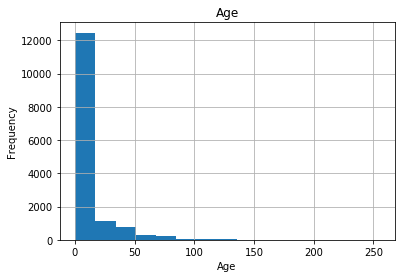

In [20]:
df.hist(column='Age', bins=15)
plt.xlabel("Age")
plt.ylabel("Frequency")

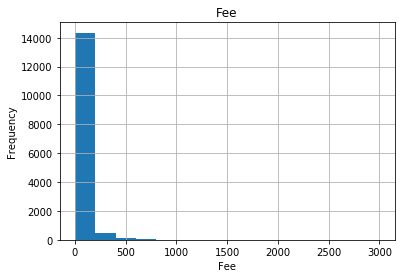

In [21]:
df.hist(column='Fee', bins='auto')

plt.xlabel("Fee")
plt.ylabel("Frequency")

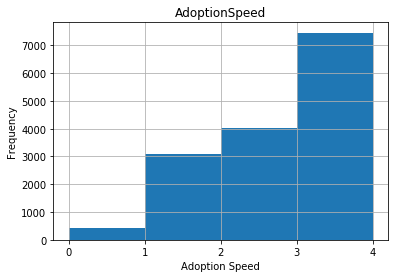

In [22]:
df.hist(column='AdoptionSpeed', bins=4)
plt.xticks(range(0, 5))
plt.xlabel("Adoption Speed")
plt.ylabel("Frequency")


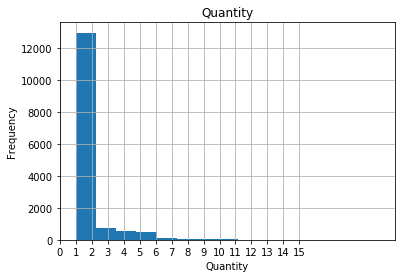

In [23]:
df.hist(column='Quantity', bins=15)
plt.xticks(range(0, 16))
plt.xlabel("Quantity")
plt.ylabel("Frequency")

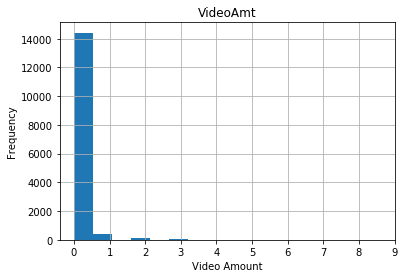

In [24]:
df.hist(column='VideoAmt', bins=15)
plt.xticks(range(0, 10))
plt.xlabel("Video Amount")
plt.ylabel("Frequency")

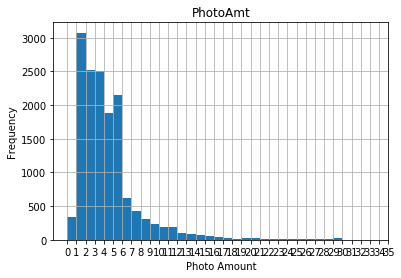

In [25]:
df.hist(column='PhotoAmt', bins=30)
plt.xticks(range(0, 36))
plt.xlabel("Photo Amount")
plt.ylabel("Frequency")